In [ ]:
## load the packages

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hydrant.topology.geom as gm
import hydrant.topology.river_graph as rg
import subprocess
import os


In [2]:
# set the path to MERIT-Basins

In [3]:
# input paths
#mb_path = '/Users/shg096/Desktop/MERIT_Hydro/cat/'
#rv_path = '/Users/shg096/Desktop/MERIT_Hydro/riv/'

mb_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
rv_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'

# output paths
path_out = '/home/shg096/scratch/Bow_at_Calgary/domain/'
#path_out = '/Users/shg096/Desktop/FHIMP/output/'
#os.makedirs(path_out)

In [4]:
# preparing the target pfaf areas for manupulation

In [5]:
pfafs = ['72']

# Define the file name templates with a placeholder *
cat_file_template = 'cat_pfaf_*_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'
riv_file_template = 'riv_pfaf_*_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'

cat_files = []
riv_files = []

for pafaf in pfafs:
    # Replace * with the current pafaf value
    cat_files.append(cat_file_template.replace('*', pafaf))
    riv_files.append(riv_file_template.replace('*', pafaf))

# reading in data and append
cat = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in cat_files])
riv = pd.concat([gpd.read_file(os.path.join(rv_path, f)) for f in riv_files])

cat.set_crs(epsg=4326, inplace=True, allow_override=True)
riv.set_crs(epsg=4326, inplace=True, allow_override=True)


,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,72000001,4.861067,3.861534,1.258844,0.014094,133.939982,2,68.7,0.014094,0,2,72000030,72000743,0,0,"LINESTRING (-77.38833 62.52250, -77.38750 62.5..."
1,72000002,2.572272,2.348346,1.095355,0.075347,44.704273,1,194.3,0.075347,0,0,0,0,0,0,"LINESTRING (-77.57833 62.51167, -77.57750 62.5..."
2,72000003,1.400671,1.303608,1.074457,0.234509,27.418033,1,329.3,0.234509,0,0,0,0,0,0,"LINESTRING (-77.15417 62.50750, -77.15333 62.5..."
3,72000004,1.914408,1.621514,1.180630,0.004531,664.592208,3,8.7,0.004531,0,2,72000005,72000400,0,0,"LINESTRING (-77.61417 61.39667, -77.61333 61.3..."
4,72000005,2.905802,2.048938,1.418199,0.000618,624.169746,3,1.8,0.000618,72000004,2,72000006,72000264,0,0,"LINESTRING (-77.58917 61.40500, -77.58833 61.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59785,72059786,8.235011,6.125759,1.344325,0.008896,51.578512,1,73.3,0.008896,72057890,0,0,0,0,0,"LINESTRING (-81.56917 41.20250, -81.57000 41.2..."
59786,72059787,0.881055,0.648637,1.358317,0.000000,28.659389,1,0.0,0.000000,72058076,0,0,0,0,0,"LINESTRING (-84.77500 41.24333, -84.77417 41.2..."
59787,72059788,0.001115,0.001115,1.000000,0.000000,28.138533,1,0.0,0.000000,0,0,0,0,0,0,"LINESTRING (-72.38500 61.88750, -72.38500 61.8..."
59788,72059789,0.001111,0.001111,1.000000,10.799241,26.348979,1,0.0,0.000000,0,0,0,0,0,0,"LINESTRING (-55.38917 47.21667, -55.38917 47.2..."


<AxesSubplot:>

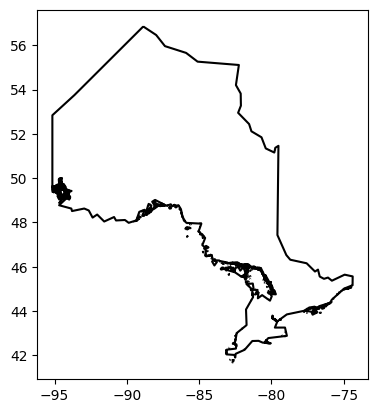

In [6]:
# Manupulate target shapefile if desired or exists (this is optional)
trg_shp = gpd.read_file('../../data/province/provinces.shp')
sel_pr = ['Quebec', 'New Brunswick', 'Nova Scotia', 'Prince Edward Island']
#sel_pr = ['Alberta']
sel_pr = ['Ontario']
# subsetting `provinces` variable
trg_provinces = trg_shp.loc[trg_shp.PRENAME.isin(sel_pr)].copy().to_crs(epsg=4326)
trg_provinces.boundary.plot(color='k')

In [7]:
cat, riv = gm.intersect_topology(cat=cat,\
                                 cat_cols={'id':'COMID'},\
                                 riv=riv,\
                                 riv_cols={'id':'COMID', 'next_id':'NextDownID'},\
                                 shapefile=trg_provinces)



<AxesSubplot:>

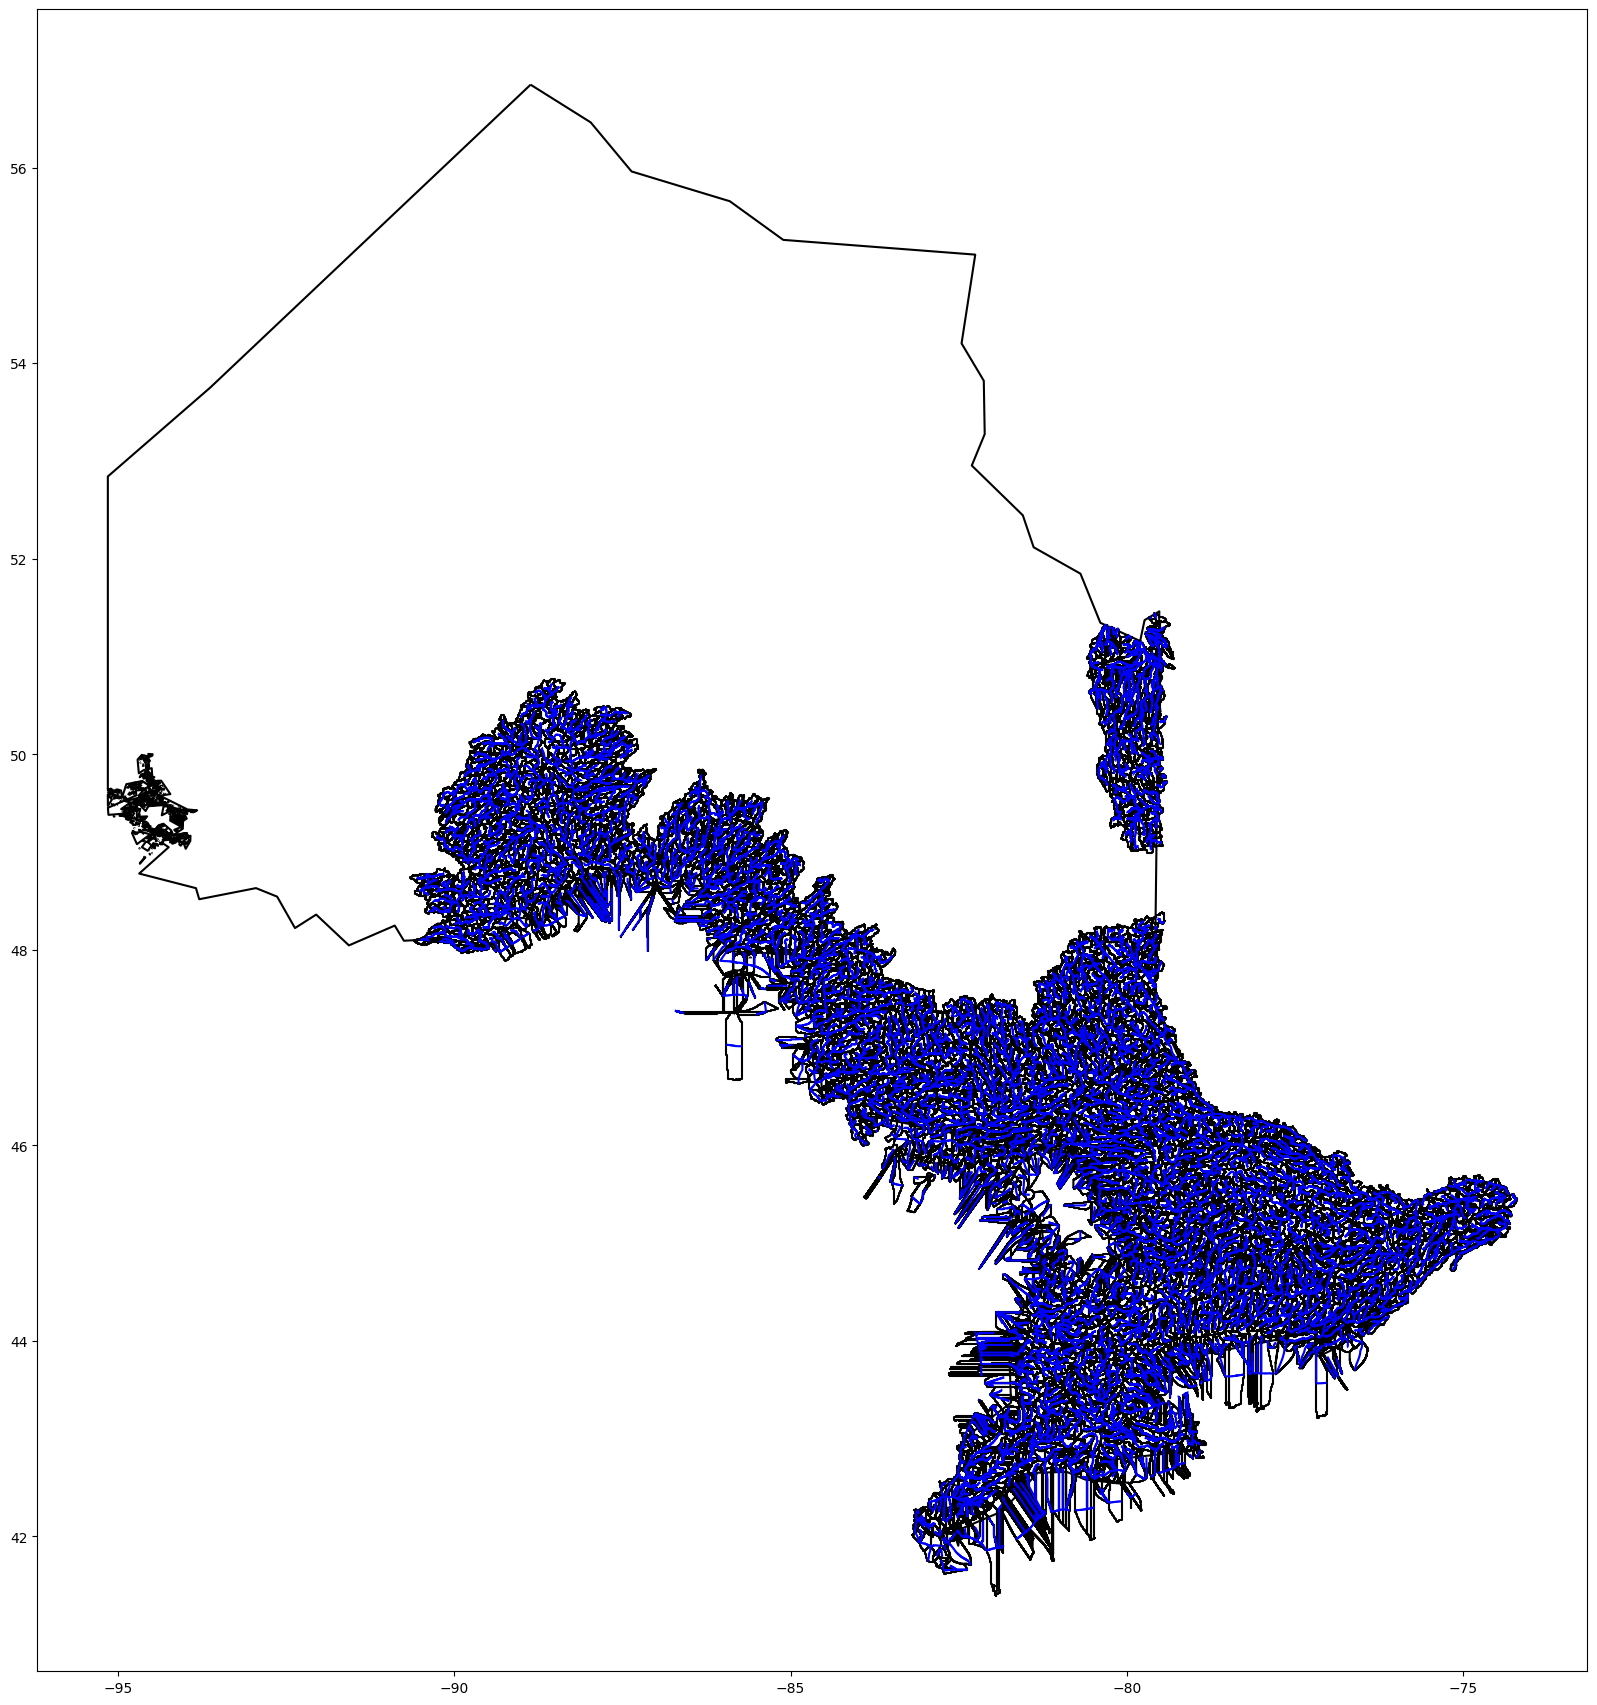

In [8]:
fig, ax = plt.subplots(figsize=(20,30))
trg_provinces.boundary.plot(ax=ax, color='k')
cat.boundary.plot(ax=ax,color='k')
riv.plot(ax=ax,color='blue')


In [9]:
def get_segment(riv,
                station_info,
                riv_col_seg,
                station_col_name = {'lat':'lat', 'lon':'lon', 'up_area':'up_area'},
                riv_col_up_area = None,
                riv_scale_up_area = None, # to m2
                station_scale_up_area = None, # to m2
                tolerance_for_dist = 0.01, # in degree 10k
                tolerance_for_area_diff = 0.05):

    # 
    if riv_col_up_area is not None:
        if riv_scale_up_area is not None:
            riv[riv_col_up_area] = riv[riv_col_up_area]*riv_scale_up_area

    # rename station
    station_info = station_info.rename(columns = station_col_name)
    print(station_info)

    if station_scale_up_area is not None:
        station_info.loc ['up_area'] = station_info.loc ['up_area'] * station_scale_up_area

    # 
    riv['lat_centroid'] = riv.centroid.y
    riv['lon_centroid'] = riv.centroid.x

    station_info['seg_id'] = np.NaN
    # loop over the station_info get the lat and lon and if available upstream area
    for index, row in station_info.iterrows():
        print(row)
        riv_temp = riv.copy()
        riv_temp['dist'] = 0
        riv_temp['dist'] = (riv['lat_centroid']-row['lat'])**2 + (riv['lon_centroid']-row['lon'])**2
        riv_temp = riv_temp [riv_temp ['dist'] < tolerance_for_dist]
        if not riv_temp.empty: # pass Nan
            if (tolerance_for_area_diff is not None) and (riv_col_up_area is not None) and ('up_area' in station_col_name.keys()):
                riv_temp['area_within'] = riv_temp[riv_col_up_area].abs()/row.up_area.item()
                riv_temp = riv_temp [riv_temp ['area_within'] < tolerance_for_area_diff]
        if not riv_temp.empty: # pass Nan
            riv_temp = riv_temp.sort_values(by='dist')
            riv_temp = riv_temp.reset_index(drop=True)
            station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]

    return station_info
        
    
        
    

In [10]:
station_info = pd.read_csv('../../data/stations/Bow_at_Calagary.csv')
station_info = pd.read_csv('../../data/stations/FHM-FFAA_station_list_copy.csv')

print(station_info)

station_info = get_segment(riv,
                station_info,
                'COMID',
                station_col_name = {'Latitude':'lat', 'Longitude':'lon'},
                riv_col_up_area = None,
                riv_scale_up_area = None, # km2 to m2
                station_scale_up_area = None, # km2 to m2
                tolerance_for_area_diff = 0.05)


    Station ID    Site type   Data type (ID_type_****.csv)  Latitude  \
0      05AA004  Unregulated    '05AA004_Peak_Flow_tab.csv'   49.4864   
1      05BL014  Unregulated  '05BL014_Annual_Flow_tab.csv'   50.6885   
2      05BL014  Unregulated    '05BL014_Peak_Flow_tab.csv'   50.6885   
3      05CC001  Unregulated  '05CC001_Annual_Flow_tab.csv'   52.3570   
4      05FA001  Unregulated  '05FA001_Annual_Flow_tab.csv'   52.6632   
..         ...          ...                            ...       ...   
355    05JK002    Regulated      05JK002_Peak_Flow_tab.csv   50.7065   
356    05NB001    Regulated    05NB001_Annual_Flow_tab.csv   49.1021   
357    05NB001    Regulated      05NB001_Peak_Flow_tab.csv   49.1021   
358    05JF001    Regulated    05JF001_Annual_Flow_tab.csv   50.6505   
359    05JF001    Regulated      05JF001_Peak_Flow_tab.csv   50.6505   

     Longitude  
0     -113.948  
1     -114.245  
2     -114.245  
3     -113.795  
4     -113.581  
..         ...  
355   -104.798  

/tmp/ipykernel_17545/402939567.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  riv['lat_centroid'] = riv.centroid.y
/tmp/ipykernel_17545/402939567.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  riv['lon_centroid'] = riv.centroid.x


Station ID                                          05AA004
Site type                                       Unregulated
Data type (ID_type_****.csv)    '05AA004_Peak_Flow_tab.csv'
lat                                                 49.4864
lon                                                -113.948
seg_id                                                  NaN
Name: 0, dtype: object
Station ID                                            05BL014
Site type                                         Unregulated
Data type (ID_type_****.csv)    '05BL014_Annual_Flow_tab.csv'
lat                                                   50.6885
lon                                                  -114.245
seg_id                                                    NaN
Name: 1, dtype: object
Station ID                                          05BL014
Site type                                       Unregulated
Data type (ID_type_****.csv)    '05BL014_Peak_Flow_tab.csv'
lat                                       

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                          02CF007
Site type                                       Unregulated
Data type (ID_type_****.csv)    '02CF007_Peak_Flow_tab.csv'
lat                                                 46.5834
lon                                                -81.1991
seg_id                                                  NaN
Name: 65, dtype: object
Station ID                                            02CF012
Site type                                         Unregulated
Data type (ID_type_****.csv)    '02CF012_Annual_Flow_tab.csv'
lat                                                   46.4273
lon                                                  -81.0984
seg_id                                                    NaN
Name: 66, dtype: object
Station ID                                            02DD014
Site type                                         Unregulated
Data type (ID_type_****.csv)    '02DD014_Annual_Flow_tab.csv'
lat                               

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                          02FF004
Site type                                       Unregulated
Data type (ID_type_****.csv)    '02FF004_Peak_Flow_tab.csv'
lat                                                 43.1608
lon                                                -81.7318
seg_id                                                  NaN
Name: 76, dtype: object
Station ID                                            02GA018
Site type                                         Unregulated
Data type (ID_type_****.csv)    '02GA018_Annual_Flow_tab.csv'
lat                                                   43.3772
lon                                                  -80.7108
seg_id                                                    NaN
Name: 77, dtype: object
Station ID                                          02GA018
Site type                                       Unregulated
Data type (ID_type_****.csv)    '02GA018_Peak_Flow_tab.csv'
lat                                     

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                            02HB012
Site type                                         Unregulated
Data type (ID_type_****.csv)    '02HB012_Annual_Flow_tab.csv'
lat                                                   43.3006
lon                                                   -79.869
seg_id                                                    NaN
Name: 87, dtype: object
Station ID                                          02HB012
Site type                                       Unregulated
Data type (ID_type_****.csv)    '02HB012_Peak_Flow_tab.csv'
lat                                                 43.3006
lon                                                 -79.869
seg_id                                                  NaN
Name: 88, dtype: object
Station ID                                            02HC009
Site type                                         Unregulated
Data type (ID_type_****.csv)    '02HC009_Annual_Flow_tab.csv'
lat                               

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                          02HC025
Site type                                       Unregulated
Data type (ID_type_****.csv)    '02HC025_Peak_Flow_tab.csv'
lat                                                 43.8113
lon                                                -79.6276
seg_id                                                  NaN
Name: 98, dtype: object
Station ID                                            02HC028
Site type                                         Unregulated
Data type (ID_type_****.csv)    '02HC028_Annual_Flow_tab.csv'
lat                                                   43.9079
lon                                                  -79.2163
seg_id                                                    NaN
Name: 99, dtype: object
Station ID                                          02HC028
Site type                                       Unregulated
Data type (ID_type_****.csv)    '02HC028_Peak_Flow_tab.csv'
lat                                     

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                          02HD008
Site type                                       Unregulated
Data type (ID_type_****.csv)    '02HD008_Peak_Flow_tab.csv'
lat                                                 43.9303
lon                                                -78.8915
seg_id                                                  NaN
Name: 109, dtype: object
Station ID                                            02HJ001
Site type                                         Unregulated
Data type (ID_type_****.csv)    '02HJ001_Annual_Flow_tab.csv'
lat                                                   44.3028
lon                                                  -78.3214
seg_id                                                    NaN
Name: 110, dtype: object
Station ID                                          02HJ001
Site type                                       Unregulated
Data type (ID_type_****.csv)    '02HJ001_Peak_Flow_tab.csv'
lat                                   

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                            02MC001
Site type                                         Unregulated
Data type (ID_type_****.csv)    '02MC001_Annual_Flow_tab.csv'
lat                                                   45.1555
lon                                                  -74.6381
seg_id                                                    NaN
Name: 120, dtype: object
Station ID                                            02OD003
Site type                                         Unregulated
Data type (ID_type_****.csv)    '02OD003_Annual_Flow_tab.csv'
lat                                                   46.0564
lon                                                  -72.3064
seg_id                                                    NaN
Name: 121, dtype: object
Station ID                                            02OG026
Site type                                         Unregulated
Data type (ID_type_****.csv)    '02OG026_Annual_Flow_tab.csv'
lat                 

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                            02HL004
Site type                                                RHBN
Data type (ID_type_****.csv)    '02HL004_Annual_Flow_tab.csv'
lat                                                   44.5496
lon                                                  -77.3281
seg_id                                                    NaN
Name: 172, dtype: object
Station ID                                          02HL004
Site type                                              RHBN
Data type (ID_type_****.csv)    '02HL004_Peak_Flow_tab.csv'
lat                                                 44.5496
lon                                                -77.3281
seg_id                                                  NaN
Name: 173, dtype: object
Station ID                                            02OE027
Site type                                                RHBN
Data type (ID_type_****.csv)    '02OE027_Annual_Flow_tab.csv'
lat                             

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                        02EB013
Site type                                       Regulated
Data type (ID_type_****.csv)    02EB013_Peak_Flow_tab.csv
lat                                               45.3927
lon                                              -79.1599
seg_id                                                NaN
Name: 262, dtype: object
Station ID                                          02FA001
Site type                                         Regulated
Data type (ID_type_****.csv)    02FA001_Annual_Flow_tab.csv
lat                                                 44.6775
lon                                                -81.2561
seg_id                                                  NaN
Name: 263, dtype: object
Station ID                                        02FA001
Site type                                       Regulated
Data type (ID_type_****.csv)    02FA001_Peak_Flow_tab.csv
lat                                               44.6775
lon       

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                          02GA031
Site type                                         Regulated
Data type (ID_type_****.csv)    02GA031_Annual_Flow_tab.csv
lat                                                 43.5761
lon                                                 -80.109
seg_id                                                  NaN
Name: 273, dtype: object
Station ID                                        02GA031
Site type                                       Regulated
Data type (ID_type_****.csv)    02GA031_Peak_Flow_tab.csv
lat                                               43.5761
lon                                               -80.109
seg_id                                                NaN
Name: 274, dtype: object
Station ID                                          02GA039
Site type                                         Regulated
Data type (ID_type_****.csv)    02GA039_Annual_Flow_tab.csv
lat                                                 43.7835
lo

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                          02GD008
Site type                                         Regulated
Data type (ID_type_****.csv)    02GD008_Annual_Flow_tab.csv
lat                                                 43.0137
lon                                                -81.2804
seg_id                                                  NaN
Name: 284, dtype: object
Station ID                                        02GD008
Site type                                       Regulated
Data type (ID_type_****.csv)    02GD008_Peak_Flow_tab.csv
lat                                               43.0137
lon                                              -81.2804
seg_id                                                NaN
Name: 285, dtype: object
Station ID                                          02GD016
Site type                                         Regulated
Data type (ID_type_****.csv)    02GD016_Annual_Flow_tab.csv
lat                                                 43.0413
lo

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                          02HB005
Site type                                         Regulated
Data type (ID_type_****.csv)    02HB005_Annual_Flow_tab.csv
lat                                                 43.5139
lon                                                -79.8797
seg_id                                                  NaN
Name: 295, dtype: object
Station ID                                        02HB005
Site type                                       Regulated
Data type (ID_type_****.csv)    02HB005_Peak_Flow_tab.csv
lat                                               43.5139
lon                                              -79.8797
seg_id                                                NaN
Name: 296, dtype: object
Station ID                                          02HB008
Site type                                         Regulated
Data type (ID_type_****.csv)    02HB008_Annual_Flow_tab.csv
lat                                                 43.6466
lo

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                        02HC005
Site type                                       Regulated
Data type (ID_type_****.csv)    02HC005_Peak_Flow_tab.csv
lat                                               43.7402
lon                                              -79.4031
seg_id                                                NaN
Name: 306, dtype: object
Station ID                                          02HC017
Site type                                         Regulated
Data type (ID_type_****.csv)    02HC017_Annual_Flow_tab.csv
lat                                                 43.6916
lon                                                -79.7594
seg_id                                                  NaN
Name: 307, dtype: object
Station ID                                          02HC024
Site type                                         Regulated
Data type (ID_type_****.csv)    02HC024_Annual_Flow_tab.csv
lat                                                 43.6859
lo

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                        02HJ003
Site type                                       Regulated
Data type (ID_type_****.csv)    02HJ003_Peak_Flow_tab.csv
lat                                               44.2981
lon                                              -78.0449
seg_id                                                NaN
Name: 319, dtype: object
Station ID                                          02HL001
Site type                                         Regulated
Data type (ID_type_****.csv)    02HL001_Annual_Flow_tab.csv
lat                                                 44.2537
lon                                                -77.4188
seg_id                                                  NaN
Name: 320, dtype: object
Station ID                                        02HL001
Site type                                       Regulated
Data type (ID_type_****.csv)    02HL001_Peak_Flow_tab.csv
lat                                               44.2537
lon       

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

Station ID                                          02KF005
Site type                                         Regulated
Data type (ID_type_****.csv)    02KF005_Annual_Flow_tab.csv
lat                                                 45.3512
lon                                                -75.8267
seg_id                                                  NaN
Name: 330, dtype: object
Station ID                                        02KF005
Site type                                       Regulated
Data type (ID_type_****.csv)    02KF005_Peak_Flow_tab.csv
lat                                               45.3512
lon                                              -75.8267
seg_id                                                NaN
Name: 331, dtype: object
Station ID                                          02KF006
Site type                                         Regulated
Data type (ID_type_****.csv)    02KF006_Annual_Flow_tab.csv
lat                                                 45.1763
lo

/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]
/tmp/ipykernel_17545/402939567.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_info['seg_id'].iloc[index] = riv_temp[riv_col

In [11]:
print(station_info)
station_info.seg_id.values
A = station_info.seg_id.values
import numpy as np
mask = np.isnan(A)
B = A[~mask]
B


    Station ID    Site type   Data type (ID_type_****.csv)      lat      lon  \
0      05AA004  Unregulated    '05AA004_Peak_Flow_tab.csv'  49.4864 -113.948   
1      05BL014  Unregulated  '05BL014_Annual_Flow_tab.csv'  50.6885 -114.245   
2      05BL014  Unregulated    '05BL014_Peak_Flow_tab.csv'  50.6885 -114.245   
3      05CC001  Unregulated  '05CC001_Annual_Flow_tab.csv'  52.3570 -113.795   
4      05FA001  Unregulated  '05FA001_Annual_Flow_tab.csv'  52.6632 -113.581   
..         ...          ...                            ...      ...      ...   
355    05JK002    Regulated      05JK002_Peak_Flow_tab.csv  50.7065 -104.798   
356    05NB001    Regulated    05NB001_Annual_Flow_tab.csv  49.1021 -103.017   
357    05NB001    Regulated      05NB001_Peak_Flow_tab.csv  49.1021 -103.017   
358    05JF001    Regulated    05JF001_Annual_Flow_tab.csv  50.6505 -104.867   
359    05JF001    Regulated      05JF001_Peak_Flow_tab.csv  50.6505 -104.867   

     seg_id  
0       NaN  
1       NaN

array([72030584., 72030584., 72041562., 72041562., 72041948., 72042864.,
       72042864., 72052396., 72052396., 72051957., 72051765., 72051765.,
       72053403., 72057000., 72057000., 72055698., 72055698., 72055509.,
       72059223., 72059223., 72058424., 72055624., 72055624., 72056014.,
       72056014., 72055724., 72055724., 72051746., 72051746., 72052836.,
       72052836., 72052485., 72052775., 72052773., 72052773., 72051951.,
       72051951., 72053061., 72053061., 72055190., 72055190., 72052528.,
       72052528., 72052983., 72057680., 72057680., 72053095., 72053095.,
       72051095., 72051095., 72051659., 72051659., 72052278., 72047166.,
       72047166., 72047608., 72048728., 72052703., 72048587., 72036265.,
       72036265., 72042068., 72042068., 72046841., 72046841., 72052534.,
       72052534., 72051656., 72051656., 72043317., 72043317., 72041185.,
       72040672., 72040672., 72047967., 72047967., 72047288., 72047288.,
       72051770., 72051770., 72053898., 72053898., 

2493

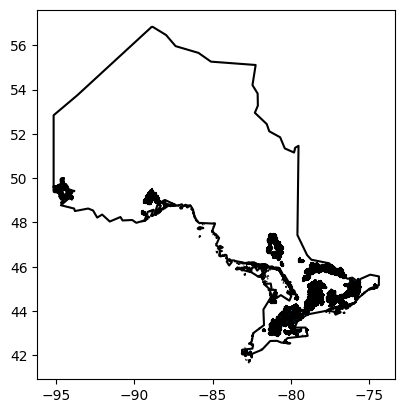

In [12]:
fig, ax = plt.subplots()
trg_provinces.boundary.plot(color='k',ax=ax)

m = 0

for i in B:

    cat_slice, riv_slice = gm.intersect_topology(cat=cat,\
                                                 cat_cols={'id':'COMID'},\
                                                 riv=riv,\
                                                 riv_cols={'id':'COMID', 'next_id':'NextDownID'},\
                                                 outlet_id=int(i))
    
    m = m + len(riv_slice)
    #trg_provinces.boundary.plot(ax=ax, color='k')
    riv_slice.plot(ax=ax)
    cat_slice.boundary.plot(ax=ax, color='k')

m

# upstream_set = rg.find_upstream(riv,
#                                 71027770,
#                                 'COMID',
#                                 'NextDownID')

# riv_slice = riv[riv['COMID'].isin(upstream_set)]
# cat_slice = cat[cat['COMID'].isin(upstream_set)]

<AxesSubplot:>

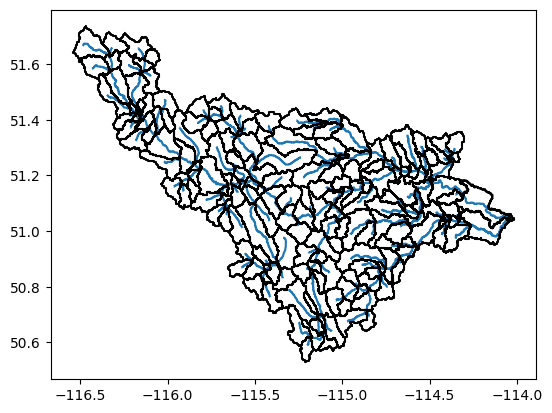

In [19]:
fig, ax = plt.subplots()
#trg_provinces.boundary.plot(ax=ax, color='k')
riv_slice.plot(ax=ax)
cat_slice.boundary.plot(ax=ax, color='k')

In [20]:
cat_slice.to_file(path_out+'Bow_at_Calgary_cat.shp')
riv_slice.to_file(path_out+'Bow_at_Calgary_riv.shp')

/tmp/ipykernel_4715/929435164.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  riv_slice.to_file(path_out+'Bow_at_Calgary_riv.shp')


In [21]:
riv_slice

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry,lat_centroid,lon_centroid
27769,71027770,2.040825,1.641712,1.243108,0.000978,9112.682461,4,2.0,0.000978,-9999,2,71027787,71027942,0,0,"LINESTRING (-114.01833 51.04417, -114.01917 51...",51.043969,-114.030198
27786,71027787,33.309245,15.747767,2.115173,0.002191,1252.709271,3,73.1,0.002191,71027770,2,71028199,71028359,0,0,"LINESTRING (-114.04167 51.04583, -114.04167 51...",51.008634,-114.140927
27941,71027942,28.145110,20.588731,1.367015,0.001798,7857.020581,4,50.7,0.001798,71027770,2,71027957,71030749,0,0,"LINESTRING (-114.04167 51.04583, -114.04250 51...",51.078911,-114.177198
27956,71027957,20.589551,13.558710,1.518548,0.001508,7669.065145,4,31.1,0.001508,71027942,2,71027962,71030189,0,0,"LINESTRING (-114.30750 51.12583, -114.30833 51...",51.160244,-114.396238
27961,71027962,2.160029,1.774091,1.217541,0.002403,7406.819260,4,5.2,0.002403,71027957,2,71027963,71028062,0,0,"LINESTRING (-114.48167 51.18000, -114.48250 51...",51.185731,-114.491914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39108,71039109,6.307484,4.937584,1.277443,0.017588,41.987611,1,111.1,0.017588,71036389,0,0,0,0,0,"LINESTRING (-115.51417 50.88583, -115.51500 50...",50.904078,-115.533883
39120,71039121,5.537017,4.428210,1.250396,0.028829,52.094426,1,160.0,0.028829,71035238,0,0,0,0,0,"LINESTRING (-115.13083 50.93000, -115.13167 50...",50.929122,-115.161885
39195,71039196,14.752598,10.106593,1.459700,0.008957,52.165900,1,132.4,0.008957,71028303,0,0,0,0,0,"LINESTRING (-114.57667 50.94583, -114.57750 50...",50.949999,-114.647416
39249,71039250,2.518299,2.040736,1.234015,0.032782,27.957672,1,82.7,0.032782,71028304,0,0,0,0,0,"LINESTRING (-115.09500 50.98083, -115.09417 50...",50.976350,-115.083124


In [16]:
import hydrant
hydrant.__file__

'/home/shg096/FHIMP/virtual_env/fhimp_venv/lib/python3.10/site-packages/hydrant/__init__.py'